In [87]:
# let's have a look at how many labels each variable has

#for col in df.columns:
 #   print(col, ': ', len(df[col].unique()), ' labels')

# Importing libraries

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing data (train, test, sample submission)

In [64]:
train=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\Term Deposit Prediction\\train.csv',parse_dates = [1])
test=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\Term Deposit Prediction\\test.csv',parse_dates = [1])
ss=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\Term Deposit Prediction\\sample_sub.csv')

train.shape, test.shape, ss.shape

((31647, 18), (13564, 17), (13564, 2))

In [65]:
train.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


# (Univariate + Bivariate Analysis)

In [66]:
import dtale
dtale.show(train)
dtale.show(train, ignore_duplicate=True)

Changing Datatypes

In [22]:
train['customer_age']=train['customer_age'].astype(float)
test['customer_age']=test['customer_age'].astype(float)

# #Check 2 : Balanced Data or Not

Target Distribution

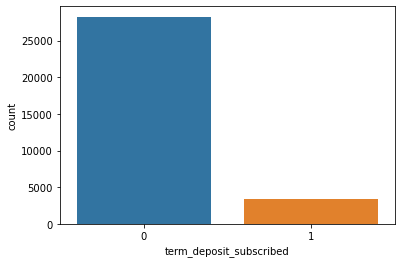

In [67]:
sns.countplot(train['term_deposit_subscribed'])

In [68]:
ID_COL, TARGET_COL = 'id', 'term_deposit_subscribed'

# #Check 3: NaN values (%) 

Percentage of NaN/Null values in Train data.

In [69]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)
#train.isnull().sum()

days_since_prev_campaign_contact    81.6
customer_age                         2.0
balance                              1.3
last_contact_duration                1.0
personal_loan                        0.5
marital                              0.5
num_contacts_in_campaign             0.4
job_type                             0.0
education                            0.0
default                              0.0
term_deposit_subscribed              0.0
housing_loan                         0.0
prev_campaign_outcome                0.0
communication_type                   0.0
day_of_month                         0.0
month                                0.0
num_contacts_prev_campaign           0.0
id                                   0.0
dtype: float64

# Merge Train + Test 

Let us merge train and test for faster manipulation of data

In [70]:
df = pd.concat([train, test], axis=0).reset_index(drop = True)
df.tail()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
45206,id_42406,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,NaN,0,unknown,NaN
45207,id_14483,NaN,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,NaN,0,unknown,NaN
45208,id_43066,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,NaN,0,unknown,NaN
45209,id_18375,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,299.0,5,failure,NaN
45210,id_12898,51.0,technician,married,unknown,no,368.0,yes,no,cellular,15,jul,102.0,2.0,NaN,0,unknown,NaN


In [71]:
df.shape

(45211, 18)

# Numerical and Categorical Features

Let us segregate numeric and categorical features for more clarity

In [79]:
col_id = 'id'                      #id
col_y = 'term_deposit_subscribed'  #target
#src = 'source'
features = [c for c in df.columns if c not in [col_id, col_y]]
cat_cols = df.select_dtypes(include=['object'])

# categorical features
cat_cols = [c for c in features if c in cat_cols]

# numerical features
num_cols = [n for n in features if n not in cat_cols]

print('categorical variables')
display(cat_cols)
print('numerical variables')
display(num_cols)

categorical variables


['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

numerical variables


['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign']

In [74]:
df['customer_age']=df['customer_age'].astype(float)

# Feature Engineering 1: Imputing Missing Values

In [75]:
for column in cat_cols:
    mode = df[column].mode()[0]
    df[column] = df[column].replace('unknown',mode)
    df[column] = df[column].replace('nan',mode)
    
for column in num_cols:
    median = df[column].median()
    df[column].fillna(median,inplace = True)
    df[column] = df[column].replace('NaN',median)

# Feature Engineering 2: Changing Datatypes

In [84]:
df['days_since_prev_campaign_contact']=df['days_since_prev_campaign_contact'].astype(int)
df['num_contacts_in_campaign']=df['num_contacts_in_campaign'].astype(int)
df['last_contact_duration']=df['last_contact_duration'].astype(int)
df['personal_loan']=df['personal_loan'].astype(str)
df['balance']=df['balance'].astype(int)
df['marital']=df['marital'].astype(str)
df['customer_age']=df['customer_age'].astype(float)

# Feature Engineeing 3: Handling Cat. labels

In [89]:
#will use drop_first=True later
df = pd.get_dummies(df, columns= cat_cols)


KeyError: "None of [Index(['job_type', 'marital', 'education', 'default', 'housing_loan',\n       'personal_loan', 'communication_type', 'month',\n       'prev_campaign_outcome'],\n      dtype='object')] are in the [columns]"

In [90]:
df.head(1)

,id,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed,job_type_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,id_43823,28.0,285,26,303,4,194,0,0.0,0,...,1,0,0,0,0,0,0,0,0,1


# Processing back the Train, Test Data

Once done with manipulation of whole data, lets process back data into train and test 

In [91]:
train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:].reset_index(drop = True)
features = [c for c in train_proc.columns if c not in [ID_COL, TARGET_COL]]

# #Feature Engineering 4 : Upsampling

Because the target feature is highly imbalanced, we need to upsample train data ,to avoid biases in results,

train_proc is a data frame with "term_deposit_subscribed" as the target column with classes 0 and 1.  


In [109]:
from sklearn.utils import resample

# Separate majority and minority classes
train_majority = train_proc.loc[train_proc.term_deposit_subscribed == 0].copy()
train_minority = train_proc.loc[train_proc.term_deposit_subscribed == 1].copy()

print(train_proc.term_deposit_subscribed.value_counts())


0.0    28253
1.0     3394
Name: term_deposit_subscribed, dtype: int64


In [110]:
# Upsample minority class
train_minority_upsampled = resample(train_minority,
                             replace=True,     # sample with replacement
                             n_samples=28253,  # to match majority class
                             random_state=123) # reproducible results

# Combine majority class with upsampled minority class
train_upsampled = pd.concat([train_majority, train_minority_upsampled])

# Display new class counts
print(train_upsampled.term_deposit_subscribed.value_counts())

1.0    28253
0.0    28253
Name: term_deposit_subscribed, dtype: int64


#    Feature-Target split

In [111]:
# Predictors
X = train_upsampled[features]

# Target
y = train_upsampled[TARGET_COL]

# Train -Test Split

In [112]:
# Dividing the data into train and test subsets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.25,
                                                 random_state=10)

# Building Model LGBM Classifier()

In [113]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
lgbm.fit(X_train,y_train)

LGBMClassifier()

# Predictions and Evaluations

In [114]:
pred=lgbm.predict(X_test)

In [115]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix\n")
print(confusion_matrix(y_test,pred))

print('\n Metrics Report\n')
print(classification_report(y_test,pred))

Confusion Matrix

[[6170  892]
 [ 190 6875]]

 Metrics Report

              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92      7062
         1.0       0.89      0.97      0.93      7065

    accuracy                           0.92     14127
   macro avg       0.93      0.92      0.92     14127
weighted avg       0.93      0.92      0.92     14127



In [120]:
X_test.shape

(14127, 50)

In [121]:
test_proc.drop(["id",'term_deposit_subscribed'], axis=1, inplace=True)

In [122]:
test_proc.shape

(13564, 50)

In [131]:
ss.drop(["term_deposit_subscribed"], axis=1, inplace=True)

KeyError: "['term_deposit_subscribed'] not found in axis"

In [132]:
X_test=test_proc
pred_final=lgbm.predict(X_test)

In [133]:
ss['term_deposit_subscribed']=pred_final

In [134]:
ss.head()

,id,term_deposit_subscribed
0,id_17231,0.0
1,id_34508,0.0
2,id_44504,0.0
3,id_174,0.0
4,id_2115,1.0


In [140]:
ss['id']=ss['id'].astype(str)
ss['term_deposit_subscribed']=ss['term_deposit_subscribed'].astype(int)
ss=ss.set_index('id')

In [143]:
ss.tail()

,term_deposit_subscribed
id,
id_42406,0
id_14483,0
id_43066,0
id_18375,0
id_12898,0


# Exporting to CSV

In [144]:
ss.to_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\Term Deposit Prediction\\prediction.csv')